## Content
-  [Integrals](#Integrals)
    -  [Rectangle method](#Rectangle-method)
-  [Numerical solution of nonlinear equations](#Numerical-solution-of-nonlinear-equations)
    -  [Bisection method](#Bisection-method)

# Integrals

Let's try calculate integral $\displaystyle \int_{-1}^{4} \! (2x^2-3) \, \mathrm{d}x = \frac {85} 3$


At first, we will find analytical (exact) solution:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, integrate
x = symbols('x')
f = (2*x**2 - 3)
display(integrate(f, (x, -1, 4)))
del(x)

85/3

In [2]:
exact_solution = 85/3
print(exact_solution)

28.333333333333332


#### Rectangle method
Now we will calculate it numerically by rectangle method:

$$\displaystyle I = \int_{a}^b f(x) \mathrm dx \approx \sum_{i=0}^{n-1}f(x_i)(x_{i+1}-x_i)$$

In [32]:
from numerical_methods import rectangle_method
# help(rectangle_method)
def func(x):
    return 2*x**2 - 3

a = -1  # lower limit
b = 4  # upper limit
n = 10  # number of subintervals
integral = rectangle_method(func, a, b, n)
print('Exact solution = ', exact_solution)
print("Approximate integral:", integral[0])
print('Difference between exact and approximate solutions equals', abs(exact_solution - integral[0]))

Exact solution =  28.333333333333332
Approximate integral: 28.125
Difference between exact and approximate solutions equals 0.20833333333333215


Let's increase the number of subintervals - rectangles

In [4]:
n = 100
integral = rectangle_method(func, a, b, n)
print('Exact solution = ', exact_solution)
print("Approximate integral:", integral[0])
print(f'Difference between exact and approximate solutions equals {abs(exact_solution - integral[0]):.15f}')

Exact solution =  28.333333333333332
Approximate integral: 28.331249999999958
Difference between exact and approximate solutions equals 0.002083333333374


Now difference between exact and approximate solutions is not significant after increasing number of rectangles

# Numerical solution of nonlinear equations
#### Bisection method

Suppose we want to solve equation $x^3+x-1$ with precision $\varepsilon = 0.0001$ by bisection method. The equation $x^3+x-1$ represent in the form $x^3 = -x+1$. 

The root of this equation is
x-coordinate of the point of intersection of graphs of functions $y = x^3$ and $y = -x +1$ in the following plot. 

The desired root is between
dots a = 0 and b = 1. Function $x^3+x-1$ at the ends of the segment $[0; 1]$ takes the values
different characters and $F(a)F(b)<0$

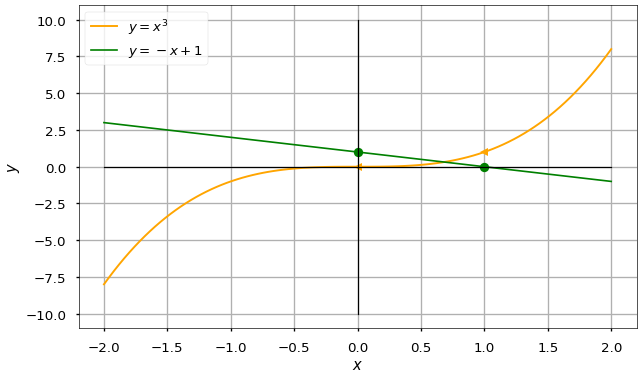

size 12.0 * 7.0
dpi 60.0


In [9]:
# plt.rcParams["figure.figsize"] = (4, 4)
plt.rcParams["figure.dpi"] = 60
def bisection_plot(a,b, aa, bb):
    with plt.style.context("seaborn-poster"):
        def func(x):
            return x**3 + x - 1
        axe_x = np.linspace(a, b, 100)
        axe_y = func(axe_x)
        f_3 = lambda x: x**3
        y_3 = f_3(axe_x)
        f_1 = lambda x: -x+1
        y_1 = f_1(axe_x)
        fig = plt.figure(figsize=(12,7))
        # plt.plot(axe_x, axe_y, label='$y=x^3+x-1$', lw=2, color='blue')
        plt.plot(axe_x, y_3, label='$y=x^3$', lw=2.3, color='orange')
        plt.plot(axe_x, y_1, label='$y=-x+1$', lw=2, color='green')
        plt.plot(1, f_1(1), 'o', color='green')
        plt.plot(0, f_1(0), 'o', color='green')
        plt.plot(1, f_3(1), marker='<', color='orange', ms=9)
        plt.plot(0, f_3(0), marker='<', color='orange', ms=9)
        plt.plot([a,b], [0,0], color='black', lw=1.45)
        plt.plot([0,0], [aa, bb], color='black', lw=1.45)
        plt.grid()
        plt.legend()
        plt.xlabel('$x$')
        plt.ylabel('$y$')
        plt.show()
        print('size', fig.get_figwidth(), '*', fig.get_figheight())
        print('dpi', fig.get_dpi())
bisection_plot(-2,2, -10,10)

##### Algorithm of bisection method
Repeat following steps until $h < e$ (actual errors < desired bound for the error)
- Step 1. Calculate $m = (a+b)/2$
- Step 2. Calculate $f(m)$ and if $f(m) = 0$ then stop -> break
- Step 3. Calculate $h = |(b-a)/2|$ for error testing
- Step 4. If $f(a)f(m) < 0$ then $b = m$ and if $f(a)f(m) > 0$ then $a = m$

Finding solution using this method:

In [6]:
from numerical_methods import bisection
def func(x):
        return x**3 + x - 1
x = bisection(func, 0, 1, 0.00001, trace=True)
print(x)

m = 0.5000000, [a, b] = [0.5000000, 1.0000000], h = 0.5000000 > 0.0000100 = e
m = 0.7500000, [a, b] = [0.5000000, 0.7500000], h = 0.2500000 > 0.0000100 = e
m = 0.6250000, [a, b] = [0.6250000, 0.7500000], h = 0.1250000 > 0.0000100 = e
m = 0.6875000, [a, b] = [0.6250000, 0.6875000], h = 0.0625000 > 0.0000100 = e
m = 0.6562500, [a, b] = [0.6562500, 0.6875000], h = 0.0312500 > 0.0000100 = e
m = 0.6718750, [a, b] = [0.6718750, 0.6875000], h = 0.0156250 > 0.0000100 = e
m = 0.6796875, [a, b] = [0.6796875, 0.6875000], h = 0.0078125 > 0.0000100 = e
m = 0.6835938, [a, b] = [0.6796875, 0.6835938], h = 0.0039062 > 0.0000100 = e
m = 0.6816406, [a, b] = [0.6816406, 0.6835938], h = 0.0019531 > 0.0000100 = e
m = 0.6826172, [a, b] = [0.6816406, 0.6826172], h = 0.0009766 > 0.0000100 = e
m = 0.6821289, [a, b] = [0.6821289, 0.6826172], h = 0.0004883 > 0.0000100 = e
m = 0.6823730, [a, b] = [0.6821289, 0.6823730], h = 0.0002441 > 0.0000100 = e
m = 0.6822510, [a, b] = [0.6822510, 0.6823730], h = 0.0001221 > 

In [28]:
# print(plt.style.available)

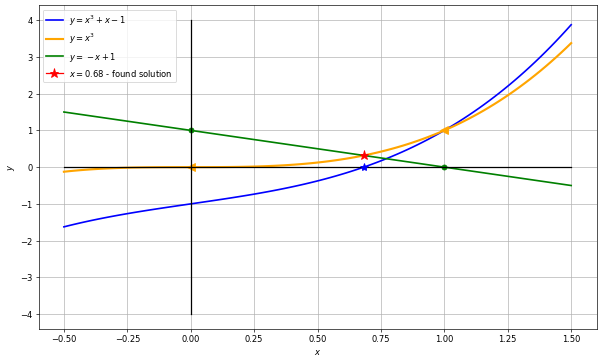

In [40]:
def bisection_plot(a,b, aa, bb):
    def func(x):
        return x**3 + x - 1
    axe_x = np.linspace(a, b, 100)
    axe_y = func(axe_x)
    f_3 = lambda x: x**3
    y_3 = f_3(axe_x)
    f_1 = lambda x: -x+1
    y_1 = f_1(axe_x)
    # with plt.style.context("seaborn-dark"):
    with plt.style.context("tableau-colorblind10"):
        plt.figure(figsize=(12,7))
        plt.plot(axe_x, axe_y, label='$y=x^3+x-1$', lw=2, color='blue')
        plt.plot(axe_x, y_3, label='$y=x^3$', lw=2.55, color='orange')
        plt.plot(axe_x, y_1, label='$y=-x+1$', lw=2, color='green')
        plt.plot(1, f_1(1), 'o', color='green')
        plt.plot(0, f_1(0), 'o', color='green')
        plt.plot(1, f_3(1), marker='<', color='orange', ms=10)
        plt.plot(0, f_3(0), marker='<', color='orange', ms=10)
        plt.plot([a,b], [0,0], color='black', lw=1.5)
        plt.plot([0,0], [aa, bb], color='black', lw=1.5)
        plt.plot(x, f_3(x), marker='*', color='red', label=f'$x = {x:.2f}$ - found solution', ms=11)
        plt.plot(x, func(x), marker='*', color='blue', ms=10)
        plt.grid()
        plt.legend()
        plt.xlabel('$x$')
        plt.ylabel('$y$')
        plt.show()
    
bisection_plot(-.5,1.5,-4,4)

In [30]:
help(bisection)

Help on function bisection in module numerical_methods.methods:

bisection(function, a, b, e, **kwargs)
    Bisection method for numerically solving unlinear equtaions
    
    Parameters
    ----------
    function : some function what you need to solve at line segment [a, b]
        e.g. 
        ```
        def function(x):
            return x**3 + x - 1
        ```
    
    a and b : let it be numbers satisfying a < b and f(a)*f(b) < 0
    
    e : the desired bound for the error
    
    trace : whether trace progress of algorithm, default: trace = False
    
    Returns
    -------
    m : float - solution of given equation
    ----------
    Algorithm :
    Repeat following steps until h < e (actual errors < desired bound for the error)
    Step 1. Calculate m = (a+b)/2
    Step 2. Calculate f(m) and if f(m) = 0 then stop -> break
    Step 3. Calculate h = |(b-a)/2| for error testing
    Step 4. If f(a)*f(m) < 0 then b = m and if f(a)*f(m) > 0 then a = m
    ---------
    Examp

#### 
[Newton method](https://en.wikipedia.org/wiki/Newton%27s_method)

Newton's method is a method to find the root of a differentiable function $f$, i.e. the value $x^∗$ such that $f(x^∗)=0$. That method is given by

$$\displaystyle b_{n+1}= b_n - \frac{ f(b_n)}{f'(b_n)}$$

Repeat above formula until $|f(x_n)| < \varepsilon$ or $|x_{n+1}-x_n| < \varepsilon$

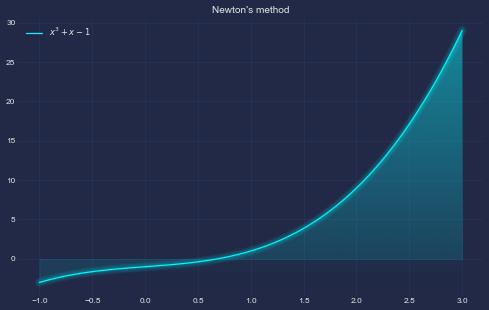

In [24]:
import mplcyberpunk

def func(x):
            return x**3 + x - 1
axe_x = np.linspace(-1, 3, 100)
axe_y = func(axe_x)
with plt.style.context('cyberpunk'):
    fig = plt.figure(figsize=(10,6))
    plt.plot(axe_x, axe_y, label='$x^3+x-1$')
    plt.legend()
    plt.title("Newton's method")
    mplcyberpunk.add_glow_effects()
    # mplcyberpunk.add_underglow()
    # mplcyberpunk.make_lines_glow()
    mplcyberpunk.add_gradient_fill(alpha_gradientglow=0.4)
    plt.show()